In [1]:
import pandas as pd       #datapreprocessing, CSV file I/O
from sklearn.preprocessing import LabelEncoder #encode the categorical variables
import numpy as np       #linear algebra
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt  #for plotting graphs
from sklearn.feature_selection import mutual_info_regression  #to get mutual information between two columns
import scipy.stats  #for statistical analysis

In [2]:
def load_dataset(path_to_file,separator):
    """
    Load the dataset using this function and then return the
    dataframe. The function parameters can be as per the code
    and problem. Return the loaded data for preprocessing steps.
    separator is Delimiter to use
    """
    return(pd.DataFrame(pd.read_csv(path_to_file,sep=separator)))

In [3]:
def pearson_cor(data_x,data_y):
    """
    measure of the linear correlation between two variables X and Y. 
    Pearson’s correlation requires that each dataset be normally distributed. 
    varies between -1 and +1 with 0 implying no correlation. 
    Correlations of -1 or +1 imply an exact linear relationship. 
    """
    return((scipy.stats.pearsonr(data_x,data_y))[0])
    

In [4]:
#to display maximum columns in the notebook
pd.set_option('display.max_columns', None)

In [5]:
#write actual path of csv file"
location="Batch05.csv"

###  read the csv file/data

In [6]:
data=load_dataset(location,",")

### analyzing the general statistic of data

In [7]:
#df.describe()

**dataframe.info()** function is used to get a concise summary of the dataframe.It becomes handy for further exploratory analysis .To get a quick overview of the dataset ,**dataframe.info()** function is used.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11300 entries, 0 to 11299
Data columns (total 16 columns):
SEX                                     11300 non-null int64
AGEGRP                                  11300 non-null int64
REGION                                  11300 non-null int64
REFILL_COUNT                            11300 non-null int64
ADMTYP                                  11300 non-null int64
Total Knee Arthrolplasty                11300 non-null int64
OSTEOARTHROSIS secondary lower leg      11300 non-null int64
Removal of Foreign Body from Eye        11300 non-null int64
Total Knee Replacement                  11300 non-null int64
OSTEOARTHROSIS primary lower leg        11300 non-null int64
OSTEOARTHROSIS generalized lower leg    11300 non-null int64
TOTAL HIP ANTHROPLASTY                  11300 non-null int64
FASCIOLOPSIASIS                         11300 non-null int64
TOTAL HIP REPLACEMENT                   11300 non-null int64
Medicine                             

In [9]:
#finding no of rows and columns

data.shape

(11300, 16)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVR

In [85]:
def Euclidean_distance(data_vector0, data_vector1):
    """
    Input: two vectors
    Output: square of distance between the two vectors
    """
    return (np.matmul((data_vector0- data_vector1),np.transpose(data_vector0- data_vector1)))

In [107]:
def train_test_split_(data,y):
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.30,stratify=y,random_state=10)
    return X_train, X_test, y_train, y_test

In [108]:
def znorm(train_x,test_x):
    
    scaler = StandardScaler()# Fit on training set only.
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    return(pd.DataFrame(train_x),pd.DataFrame(test_x))

def normalization(df_data):
    names = df_data.columns
    scaler = MinMaxScaler()
    X_train_minmax = scaler.fit_transform(df_data)
    return pd.Dateframe(scaled_df, columns = names)


In [109]:
def dimensionality_reduction(train_x,test_x):
    pca=PCA(0.95)  # keep those eigen vectors only which have variance greaten than equal to 0.95
    pca.fit(train_x)
    #print(pca.components_)
    pca.transform(train_x)
    #print(pca.n_components_)
    pca.transform(test_x)
    print(pca.n_components_)
    return(train_x,test_x)

Description of Dataset and Problem Statement
This dataset contains data of several patients in the US refilling different medications from pharmacies. Each row in data is a patient who refills a particular medicine. The description of different columns is detailed below.

 SEX: Contains the gender of patient- 1 means male and 2 means female.

 AGEGRP: contains the age-group to which the patient belongs. 0-17 means age-group 1 and there are a total of 5 different age-groups in increasing age range from 1 to 5.  

 REGION: The region contains the area where the patient belongs. For example, 3 depicts the South region. There are a total of 5 region codes.

 REFILL_COUNT: depicts the count of the medicine the patient bought.

 ADMTYP: contains the category of a patient, whether the patient belongs to the surgery department, maternity department, etc. These departments have been coded.

 Then, there are several columns related to diagnostic and procedure codes. So, if a patient underwent a particular procedure, then there is value 1 in the cell otherwise it is 0 in the cell.

Medicine: column depicts 3 medicines. Patient can consume medicine 1, 2, or 3.

Class: The class column depicts whether the patient is a frequent buyer of the medicine (1) or an infrequent buyer of the medicine (2).

 --------------------------------------------------------------------------------------------------------------------
Perform the data cleaning if required. Perform the descriptive analytics to understand the data and infer from the data. 
Perform the predictive analytics (classification) on predicting the whether the patient is frequent buyer of medicine or not. Use different classification techniques and compare the results. Perform the data pre-processing (normalization, standardization, correlation analysis & feature section, dimension reduction using PCA) and compare the results of classification with unprocessed data.
Consider 70% of data from each class for training and remaining 30% of data from each class for testing.   

Infer the results obtained from descriptive and predictive analytics.  


In [110]:
# Predicting the whether the patient is frequent buyer of medicine or not.
# target attribute "Class"
dataset = data.groupby(['Class'])

In [111]:
col = data.columns

Class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SEX, dtype: object

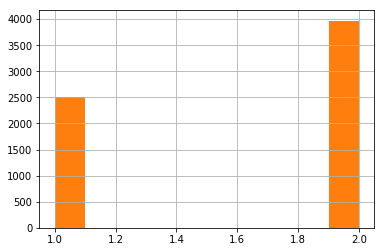

In [112]:
dataset['SEX'].hist()

Class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AGEGRP, dtype: object

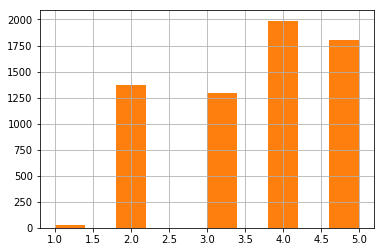

In [113]:
dataset['AGEGRP'].hist()

Class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: REGION, dtype: object

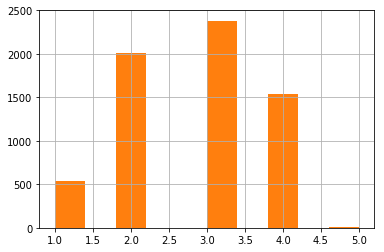

In [114]:
dataset['REGION'].hist()

Class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Medicine, dtype: object

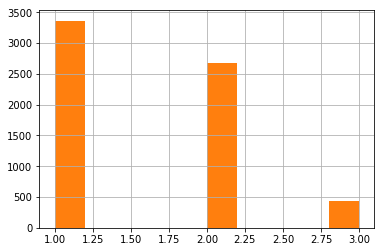

In [115]:
dataset['Medicine'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001828605A390>,
      dtype=object)

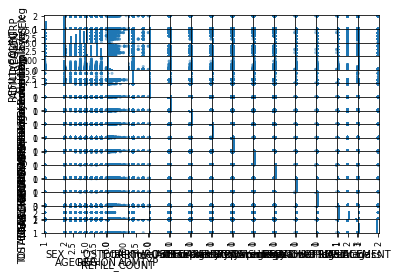

In [116]:
% matplotlib inline
pd.plotting.scatter_matrix(data)

In [117]:
data.corr(method = 'pearson' )

,SEX,AGEGRP,REGION,REFILL_COUNT,ADMTYP,Total Knee Arthrolplasty,OSTEOARTHROSIS secondary lower leg,Removal of Foreign Body from Eye,Total Knee Replacement,OSTEOARTHROSIS primary lower leg,OSTEOARTHROSIS generalized lower leg,TOTAL HIP ANTHROPLASTY,FASCIOLOPSIASIS,TOTAL HIP REPLACEMENT,Medicine,Class
SEX,1.000000,-0.078626,0.043444,-0.003112,-0.013800,-0.006020,-0.010938,-0.009699,0.000632,0.008887,-0.005323,0.012708,0.010375,0.012708,0.083645,-0.022928
AGEGRP,-0.078626,1.000000,0.007598,0.074064,-0.040294,0.107846,0.095619,0.112939,0.109494,0.050441,0.090744,0.009619,0.009935,0.009619,-0.061283,-0.066909
REGION,0.043444,0.007598,1.000000,-0.036864,-0.010473,-0.014688,-0.011139,-0.009283,-0.016043,0.014743,-0.027198,-0.001740,-0.003885,-0.001740,0.106174,-0.001119
REFILL_COUNT,-0.003112,0.074064,-0.036864,1.000000,0.004658,0.000100,0.000965,0.006812,0.002580,-0.016748,0.024023,-0.006910,-0.006420,-0.006910,-0.223175,-0.602819
ADMTYP,-0.013800,-0.040294,-0.010473,0.004658,1.000000,-0.006180,0.004116,-0.002793,-0.004510,-0.006073,-0.000511,-0.070161,-0.057283,-0.070161,0.027314,0.000667
Total Knee Arthrolplasty,-0.006020,0.107846,-0.014688,0.000100,-0.006180,1.000000,0.723700,0.833862,0.905475,0.468703,0.580282,-0.002446,-0.001997,-0.002446,-0.004569,0.014778
OSTEOARTHROSIS secondary lower leg,-0.010938,0.095619,-0.011139,0.000965,0.004116,0.723700,1.000000,0.671132,0.778238,0.354142,0.462556,-0.002395,-0.001956,-0.002395,-0.006301,0.001070
Removal of Foreign Body from Eye,-0.009699,0.112939,-0.009283,0.006812,-0.002793,0.833862,0.671132,1.000000,0.821623,0.411325,0.587046,-0.002559,-0.002090,-0.002559,-0.013728,0.009253
Total Knee Replacement,0.000632,0.109494,-0.016043,0.002580,-0.004510,0.905475,0.778238,0.821623,1.000000,0.457576,0.616937,-0.002668,-0.002178,-0.002668,-0.006694,0.010917
OSTEOARTHROSIS primary lower leg,0.008887,0.050441,0.014743,-0.016748,-0.006073,0.468703,0.354142,0.411325,0.457576,1.000000,-0.009915,-0.001296,-0.001058,-0.001296,0.076683,0.020971


In [243]:
# Classification
# Building a classifier (data modeling)

# Nearest Neighbour
def nn_model(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    print("Accuracy Score: ",percentage_accuracy(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    print(f_score(y_test,y_predict))
    print()


# K-Nearest Neighbour Classification
def knn_model(X_train, X_test, y_train, y_test, Kmax=22):
    K = list(range(3,Kmax,2))
    Accuracy_scores = []
    for k in K:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        print(k," Nearest Neighbours\n")
        y_predict = knn.predict(X_test)
        print("Accuracy Score: ",percentage_accuracy(y_test,y_predict))
        Accuracy_scores.append(percentage_accuracy(y_test,y_predict))
        print(confusion_matrix(y_test,y_predict))
        print(f_score(y_test,y_predict))
    plt.plot(K,Accuracy_scores, label = "Test Accuracy")
    plt.show()

# Bayes-Classifier with unimodal Gaussian Density
def bayes_model(df):
    col = df.columns
    df_0 = group_this_df(df, col[-1])[1]
    df_1 = group_this_df(df, col[-1])[2]

    pC0 = df_0.shape[0]/df.shape[0]
    pC1 = df_1.shape[0]/df.shape[0]

    X_train0, X_test0, y_train0, y_test0 = train_test_split(df_0[df_0.columns[:-1]], df_0[col[-1]], test_size=0.3,random_state=42)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(df_1[df_0.columns[:-1]], df_1[col[-1]], test_size=0.3,random_state=42)

    test = np.concatenate((X_test0, X_test1))
    y_test = np.concatenate((y_test0, y_test1))
    gmm = GaussianMixture(n_components=1)
    gmm.fit(X_train0)
    gmm2 = GaussianMixture(n_components=1)
    gmm2.fit(X_train1)

    ypred = []
    for i in test:
        ypred.append(0 if prob(i, gmm.weights_, gmm.means_, gmm.covariances_)*pC0> prob(i, gmm2.weights_, gmm2.means_, gmm2.covariances_)*pC1 else 1)
    print(percentage_accuracy(y_test, ypred))
    print(confusion_matrix(y_test, ypred))
    print()
    
# Bayes-Classifier with multimodal Gaussian Density
def group_this_df(df, target):
    return dict(tuple(df.groupby(target)))
def prob(x, w, mean, cov):
    p = 0
    for i in range(len(w)):
        p += w[i] * multivariate_normal.pdf(x, mean[i], cov[i], allow_singular=True)
    return p
def bayes_gmm_model(df):
    col = df.columns
    df_0 = group_this_df(df, col[-1])[1]
    df_1 = group_this_df(df, col[-1])[2]

    pC0 = df_0.shape[0]/df.shape[0]
    pC1 = df_1.shape[0]/df.shape[0]

    X_train0, X_test0, y_train0, y_test0 = train_test_split(df_0[df_0.columns[:-1]], df_0[col[-1]], test_size=0.3,random_state=42)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(df_1[df_0.columns[:-1]], df_1[col[-1]], test_size=0.3,random_state=42)

    test = np.concatenate((X_test0, X_test1))
    pred = np.concatenate((y_test0, y_test1))
    Accu = []
    Q = list(range(2,18,2))
    for q in Q:
        gmm = GaussianMixture(n_components=q)
        gmm.fit(X_train0)
        gmm2 = GaussianMixture(n_components=q)
        gmm2.fit(X_train1)
        ypred = []
        for i in test:
            ypred.append(0 if prob(i, gmm.weights_, gmm.means_, gmm.covariances_)*pC0> prob(i, gmm2.weights_, gmm2.means_, gmm2.covariances_)*pC1 else 1)
        print("Accuracy for GMM  Bayes Classifier for", q ," value: ")
        Accu.append(percentage_accuracy(pred, ypred))
        print(percentage_accuracy(pred, ypred))
        print(confusion_matrix(pred, ypred))
        print()
    plt.plot(Q,Accu)
    plt.show()
  
    

In [238]:
# Calculate model evaluation scores like
"""
- F-score
- Confusion Matrix
- accuracy score
"""

def f_score(y_test, y_pred):
    return metrics.f1_score(y_test, y_pred,average='binary')

def confusion_matrix(y_test, y_pred):
    return metrics.confusion_matrix(y_test, y_pred)

def percentage_accuracy(Y_test,y_pred): 
    return metrics.accuracy_score(Y_test,y_pred)

In [233]:
# Original data
X = data[col[:-1]]
y = data[col[-1]]
X_train, X_test, y_train, y_test = train_test_split_(X,y)


In [240]:
nn_model(X_train, X_test, y_train, y_test)

Accuracy Score:  0.9985250737463127
[[1440    5]
 [   0 1945]]
0.9982668977469671



3  Nearest Neighbours

Accuracy Score:  0.9973451327433628
[[1436    9]
 [   0 1945]]
0.996876084692815
5  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
7  Nearest Neighbours

Accuracy Score:  0.995575221238938
[[1430   15]
 [   0 1945]]
0.994782608695652
9  Nearest Neighbours

Accuracy Score:  0.9943952802359882
[[1426   19]
 [   0 1945]]
0.9933820968303727
11  Nearest Neighbours

Accuracy Score:  0.9941002949852508
[[1425   20]
 [   0 1945]]
0.9930313588850175
13  Nearest Neighbours

Accuracy Score:  0.9935103244837759
[[1423   22]
 [   0 1945]]
0.9923291492329149
15  Nearest Neighbours

Accuracy Score:  0.9935103244837759
[[1423   22]
 [   0 1945]]
0.9923291492329149
17  Nearest Neighbours

Accuracy Score:  0.9943952802359882
[[1426   19]
 [   0 1945]]
0.9933820968303727
19  Nearest Neighbours

Accuracy Score:  0.9946902654867257
[[1427   18]
 [   0 1945]]
0.9937325905292479
21  Nearest Neighbours

Accuracy Score:  0.9946902654

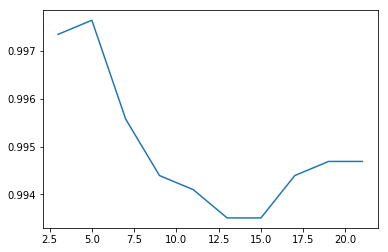

In [241]:
knn_model(X_train, X_test, y_train, y_test)

In [226]:
bayes_model(data)

0.0038336773813034504
[[   0    0    0]
 [1432   13    0]
 [ 166 1780    0]]
0.0026765493102738317



C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Accuracy for GMM  Bayes Classifier for 2  value: 
0.0020642878207018578
[[   0    0    0]
 [1438    7    0]
 [1728  218    0]]
0.0027944111776447103



C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Accuracy for GMM  Bayes Classifier for 4  value: 
0.0011795930404010617
[[   0    0    0]
 [1441    4    0]
 [ 792 1154    0]]
0.0010244589576130106



C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Accuracy for GMM  Bayes Classifier for 6  value: 
0.002948982601002654
[[   0    0    0]
 [1435   10    0]
 [ 607 1339    0]]
0.0023860653781913625



C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Accuracy for GMM  Bayes Classifier for 8  value: 
0.00707755824240637
[[   0    0    0]
 [1421   24    0]
 [ 424 1522    0]]
0.005349381477766633



C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Accuracy for GMM  Bayes Classifier for 10  value: 
0.0005897965202005308
[[   0    0    0]
 [1443    2    0]
 [ 367 1579    0]]
0.0004406256884776383



C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Accuracy for GMM  Bayes Classifier for 12  value: 
0.005013270421704512
[[   0    0    0]
 [1428   17    0]
 [ 435 1511    0]]
0.0038120865567888777



C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Accuracy for GMM  Bayes Classifier for 14  value: 
0.0005897965202005308
[[   0    0    0]
 [1443    2    0]
 [1152  794    0]]
0.0005949724825226834



C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Accuracy for GMM  Bayes Classifier for 16  value: 
0.005897965202005308
[[   0    0    0]
 [1425   20    0]
 [ 382 1564    0]]
0.004401892813909981



C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shrikha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


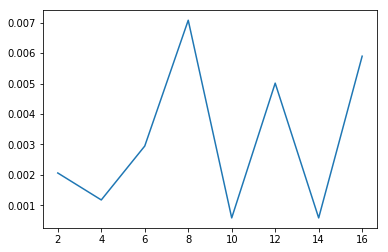

In [224]:
bayes_gmm_model(data)

In [186]:
# PCA
#redu_xTrain, redu_xTest = dimensionality_reduction(X_train, X_test)
#redu_xTrain

In [194]:
def Dimensionality_reduction(dataframe):
    D =  np.array(dataframe)
    covar = np.matmul(D.T,D)
    val,vec = np.linalg.eig(covar)
    val = list(val)
    val1 = val
    val1.sort(reverse=True)
    print("eigen values in descending order :",val1)
    ind = []
    col = []
    for i in range(10):
        ind.append(val.index(val1[i]))
        col.append(vec.T[ind[i]])
    col = np.array(col)
    d = np.matmul(col,D.T)
    index=[]
    for i in range(10):
        index.append(i)
    data = pd.DataFrame(d.T,index=dataframe.index)
    return data
red_data = Dimensionality_reduction(data)

eigen values in descending order : [2224221.6189608453, 254913.20309387878, 10838.244109263294, 5454.376613063427, 2877.982053245981, 2241.9722137309695, 1045.7661621446691, 939.8445937979619, 118.10788719789888, 84.57648772386298, 50.63031367802753, 33.84054031927873, 22.881260687209856, 7.420001805897073, 0.5357086142207562, -2.8573500138672464e-15]


In [234]:
def pca_given_l (l):
    d1 = red_data.iloc[:,0:l]
    data_r = d1.copy()
    data_r[len(d1.columns)] = y
    X_train, X_test, y_train, y_test = train_test_split_(d1,y)
    nn_model(X_train, X_test, y_train, y_test)
    knn_model(X_train, X_test, y_train, y_test)
    bayes_model(data_r)
    bayes_gmm_model(data_r)

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0

3  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
5  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
7  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
9  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
11  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
13  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
15  Nearest Neighbours

Accuracy Score:  0.9979351032448378
[[1438    7]
 [   0 1945]]
0.9975719736385709
17  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
19  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
21  Nearest Neighbours

Acc

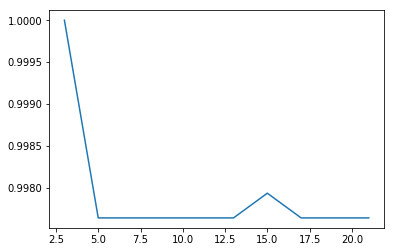

0.0017693895606015924
[[   0    0    0]
 [1439    6    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 2  value: 
0.0002948982601002654
[[   0    0    0]
 [1444    1    0]
 [   2 1944    0]]

Accuracy for GMM  Bayes Classifier for 4  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 6  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 8  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   2 1944    0]]

Accuracy for GMM  Bayes Classifier for 10  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 12  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 14  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 16  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]



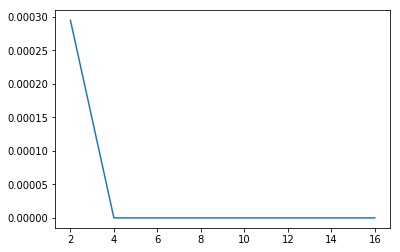

In [244]:
# Doing PCA for l=1
pca_given_l(1)

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0

3  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
5  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
7  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
9  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
11  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
13  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
15  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
17  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
19  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
21  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0


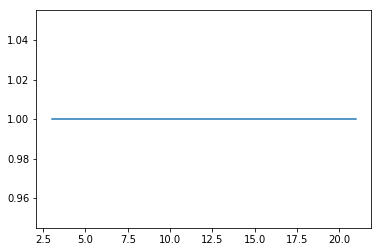

0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 2  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 4  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 6  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 8  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 10  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 12  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 14  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 16  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]



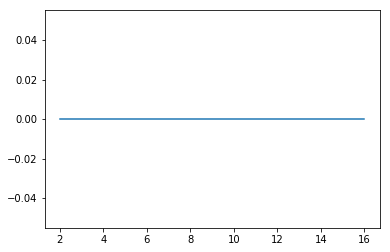

In [245]:
# Doing PCA for l=2
pca_given_l(2)

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0

3  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
5  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
7  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
9  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
11  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
13  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
15  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
17  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
19  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
21  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0


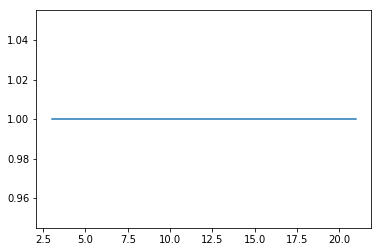

0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 2  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 4  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   1 1945    0]]

Accuracy for GMM  Bayes Classifier for 6  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 8  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 10  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   2 1944    0]]

Accuracy for GMM  Bayes Classifier for 12  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 14  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 16  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   2 1944    0]]



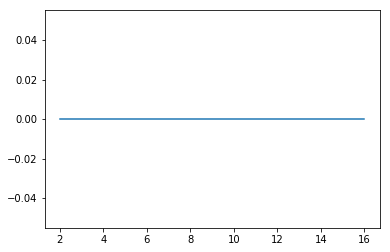

In [246]:
# Doing PCA for l=3
pca_given_l(3)

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0

3  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
5  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
7  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
9  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
11  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
13  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
15  Nearest Neighbours

Accuracy Score:  0.9979351032448378
[[1438    7]
 [   0 1945]]
0.9975719736385709
17  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
19  Nearest Neighbours

Accuracy Score:  0.9976401179941002
[[1437    8]
 [   0 1945]]
0.9972241498959057
21  Nearest Neighbours

Acc

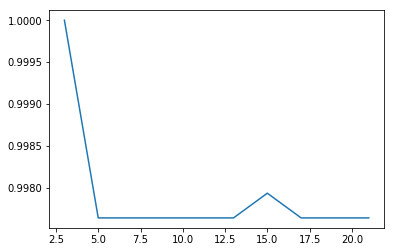

0.0017693895606015924
[[   0    0    0]
 [1439    6    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 2  value: 
0.0002948982601002654
[[   0    0    0]
 [1444    1    0]
 [   2 1944    0]]

Accuracy for GMM  Bayes Classifier for 4  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   2 1944    0]]

Accuracy for GMM  Bayes Classifier for 6  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   2 1944    0]]

Accuracy for GMM  Bayes Classifier for 8  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 10  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 12  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 14  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 16  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]



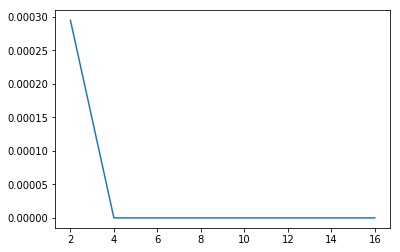

In [247]:
# Doing PCA for l=4
pca_given_l(1)

In [251]:
# Feature subset selection
from scipy.stats.stats import pearsonr
for attr in col[:-1]:
    print(attr,"  ",pearsonr(data[attr],data[col[-1]])[0])

SEX    -0.022927833175784083
AGEGRP    -0.06690921600992919
REGION    -0.0011192859220723185
REFILL_COUNT    -0.6028187901342353
ADMTYP    0.0006670893930201674
Total Knee Arthrolplasty    0.01477762489235768
OSTEOARTHROSIS secondary lower leg    0.0010702471039462386
Removal of Foreign Body from Eye    0.009252896762120016
Total Knee Replacement    0.010917066256215063
OSTEOARTHROSIS primary lower leg    0.020970880800436686
OSTEOARTHROSIS generalized lower leg    -0.0033060213707193534
TOTAL HIP ANTHROPLASTY    0.003060044835251118
FASCIOLOPSIASIS    0.01146663394858448
TOTAL HIP REPLACEMENT    0.003060044835251118
Medicine    0.20589254192569523


Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0

3  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
5  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
7  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
9  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
11  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
13  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
15  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
17  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
19  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0
21  Nearest Neighbours

Accuracy Score:  1.0
[[1445    0]
 [   0 1945]]
1.0


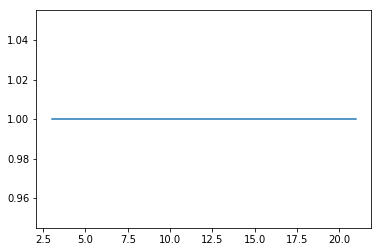

0.0017693895606015924
[[   0    0    0]
 [1439    6    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 2  value: 
0.0002948982601002654
[[   0    0    0]
 [1444    1    0]
 [   2 1944    0]]

Accuracy for GMM  Bayes Classifier for 4  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 6  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   2 1944    0]]

Accuracy for GMM  Bayes Classifier for 8  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   2 1944    0]]

Accuracy for GMM  Bayes Classifier for 10  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 12  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 14  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]

Accuracy for GMM  Bayes Classifier for 16  value: 
0.0
[[   0    0    0]
 [1445    0    0]
 [   0 1946    0]]



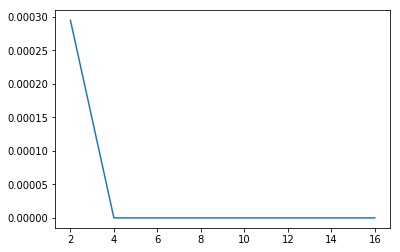

In [255]:
# Refill count is most correlated to the class
d2 = data['REFILL_COUNT']
data_n = d2.copy()
data_n['Class'] = y
X_train, X_test, y_train, y_test = train_test_split_(d2.values.reshape(-1,1),y)
nn_model(X_train, X_test, y_train, y_test)
knn_model(X_train, X_test, y_train, y_test)
bayes_model(data_r)
bayes_gmm_model(data_r)

In [ ]:
# Standardization / normalization 
# In this data mostly attributes are categorical hence standarization and normalization doesn't make sense 

## Additional areas to focus on 

In [ ]:
# Predict the gender of the new patient given the department attribute(ADMTYP)

In [ ]:
# Predict the Age of the new patient given the department attribute(ADMTYP)

In [ ]:
# Predict patient would under go which particular procedure(9) given all other attributes

In [ ]:
# Predict the refill count given the medicine

In [ ]:
# Given sex, agegrp, region predict which department(ADMTYP)